In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('D:\Cars\car_data.csv')
display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [25]:
df['Years_Old']= 2023 - df['Year']
display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [26]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [27]:
# there can be many different car names(categorical) and it is of no use
# we have already taken how old is the car so we don't need to take the year in which it was bought
df.drop(['Car_Name', 'Owner', 'Year'], axis=1, inplace= True)

In [28]:
df = pd.get_dummies(df, drop_first= True)
df

,Selling_Price,Present_Price,Kms_Driven,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,9,0,1,0,1
1,4.75,9.54,43000,10,1,0,0,1
2,7.25,9.85,6900,6,0,1,0,1
3,2.85,4.15,5200,12,0,1,0,1
4,4.60,6.87,42450,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,7,1,0,0,1
297,4.00,5.90,60000,8,0,1,0,1
298,3.35,11.00,87934,14,0,1,0,1
299,11.50,12.50,9000,6,1,0,0,1


<Axes: >

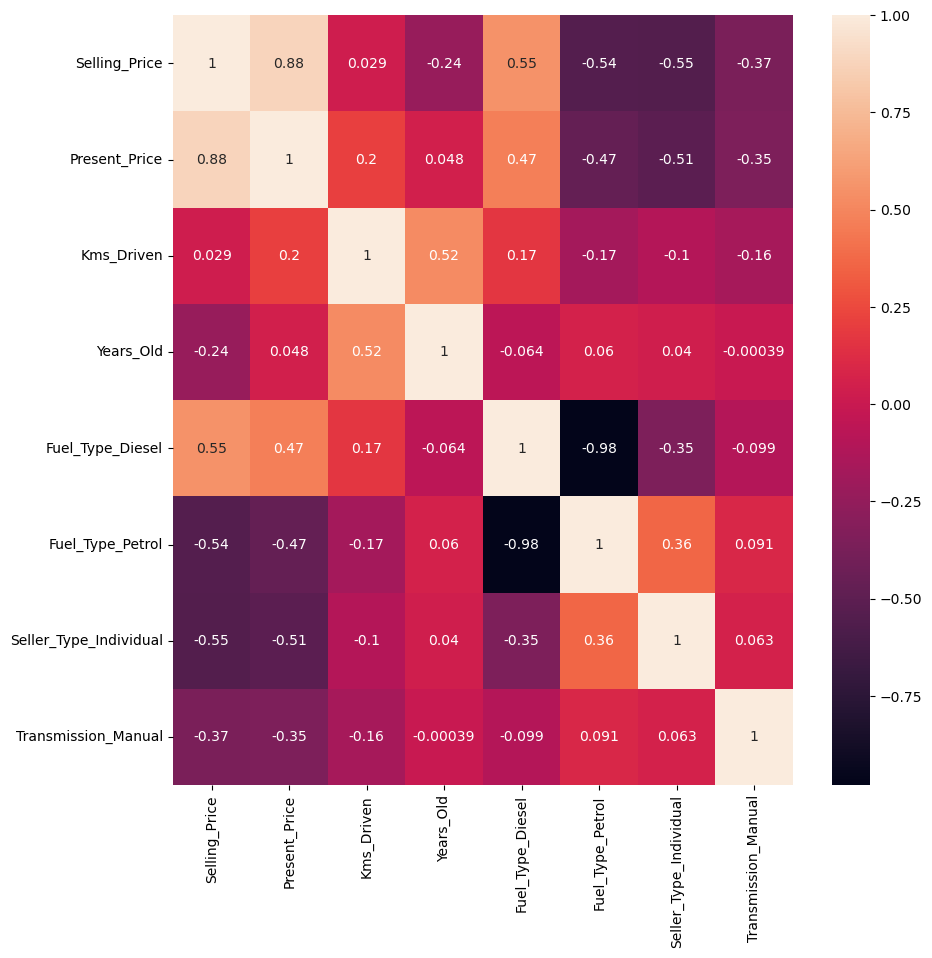

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [30]:
#only selling price is dependent and all others are independent
#both x and y contain all rows 
# x contains all colums starting from 2nd column i.e., index 1 and y contains only first column i.e., index 0
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [31]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [33]:
print(model.feature_importances_)

[0.37982571 0.04179998 0.07637393 0.24214303 0.00750549 0.11014714
 0.14220472]


<Axes: >

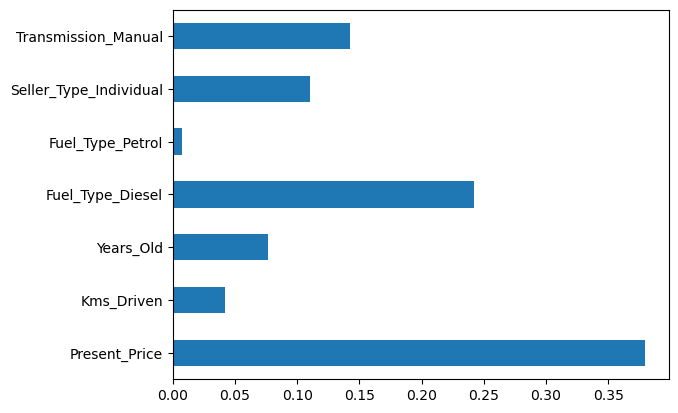

In [34]:
feature_imp = pd.Series(model.feature_importances_, index = x.columns)
feature_imp.plot(kind= "barh")


In [35]:
#splitting train and test data
#test size would be 10% of the total data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [36]:
x_train.shape, x_test.shape

((270, 7), (31, 7))

In [37]:
y_train.shape, y_test.shape

((270,), (31,))

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
lr_model = linear_model.LinearRegression()

In [40]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [41]:
training_data_prediction = lr_model.predict(x_train)

In [42]:
print('Coefficients: ', lr_model.coef_),
print('Intercept: ', lr_model.intercept_),
print('Mean Squared Error (MSE) : %.2f' %mean_squared_error(y_train, training_data_prediction)),
print('Coefficient of determination (R^2) : %.2f' %r2_score(y_train, training_data_prediction))

Coefficients:  [ 4.06171145e-01 -5.24121815e-06 -3.87168219e-01  2.75835815e+00
  8.39365988e-01 -1.33720484e+00 -1.04834846e+00]
Intercept:  5.51434632304985
Mean Squared Error (MSE) : 2.60
Coefficient of determination (R^2) : 0.87


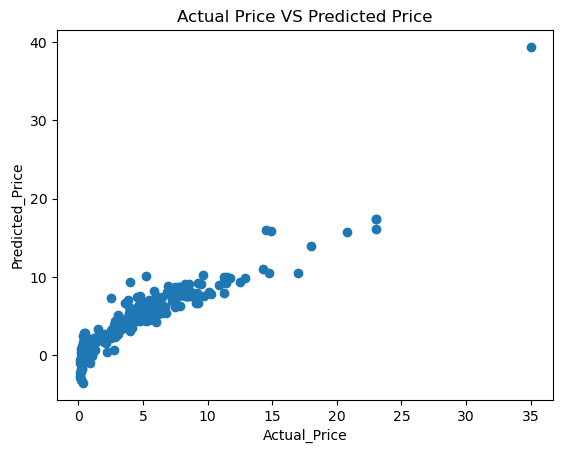

In [43]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

In [44]:
test_data_prediction = lr_model.predict(x_test)

In [45]:
print('Coefficients: ', lr_model.coef_),
print('Intercept: ', lr_model.intercept_),
print('Mean Squared Error (MSE) : %.2f' %mean_squared_error(y_test, test_data_prediction)),
print('Coefficient of determination (R^2) : %.2f' %r2_score(y_test, test_data_prediction))

Coefficients:  [ 4.06171145e-01 -5.24121815e-06 -3.87168219e-01  2.75835815e+00
  8.39365988e-01 -1.33720484e+00 -1.04834846e+00]
Intercept:  5.51434632304985
Mean Squared Error (MSE) : 7.78
Coefficient of determination (R^2) : 0.88


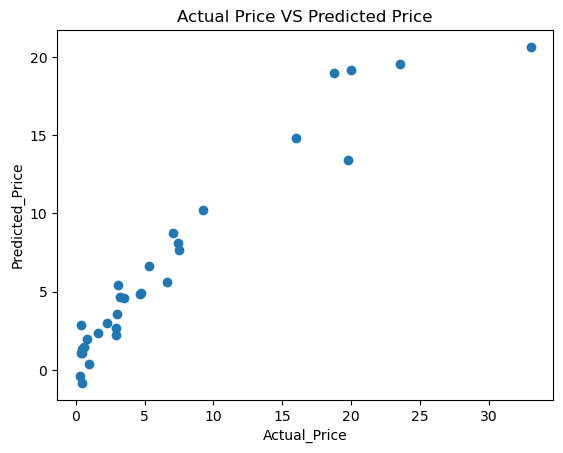

In [46]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

## Lasso Regression

In [47]:
ls_model = linear_model.Lasso()

In [48]:
ls_model.fit(x_train, y_train)

Lasso()

In [49]:
training_data_prediction = ls_model.predict(x_train)

In [50]:
print('Coefficients: ', ls_model.coef_),
print('Intercept: ', ls_model.intercept_),
print('Mean Squared Error (MSE) : %.2f' %mean_squared_error(y_train, training_data_prediction)),
print('Coefficient of determination (R^2) : %.2f' %r2_score(y_train, training_data_prediction))

Coefficients:  [ 4.80491398e-01 -5.03882243e-06 -3.16826185e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
Intercept:  4.107182694386102
Mean Squared Error (MSE) : 3.63
Coefficient of determination (R^2) : 0.82


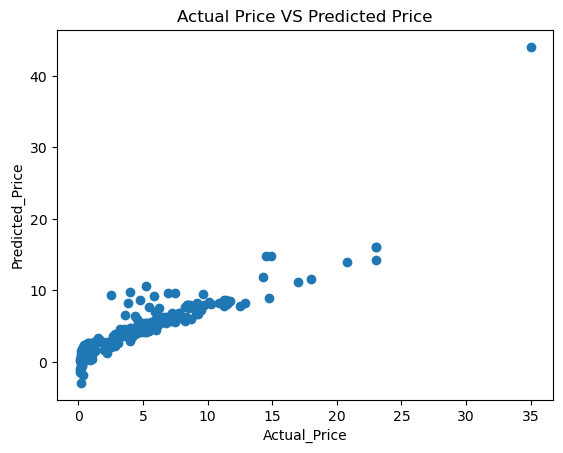

In [51]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

In [52]:
test_data_prediction = ls_model.predict(x_test)

In [53]:
print('Coefficients: ', ls_model.coef_),
print('Intercept: ', ls_model.intercept_),
print('Mean Squared Error (MSE) : %.2f' %mean_squared_error(y_test, test_data_prediction)),
print('Coefficient of determination (R^2) : %.2f' %r2_score(y_test, test_data_prediction))

Coefficients:  [ 4.80491398e-01 -5.03882243e-06 -3.16826185e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
Intercept:  4.107182694386102
Mean Squared Error (MSE) : 9.11
Coefficient of determination (R^2) : 0.86


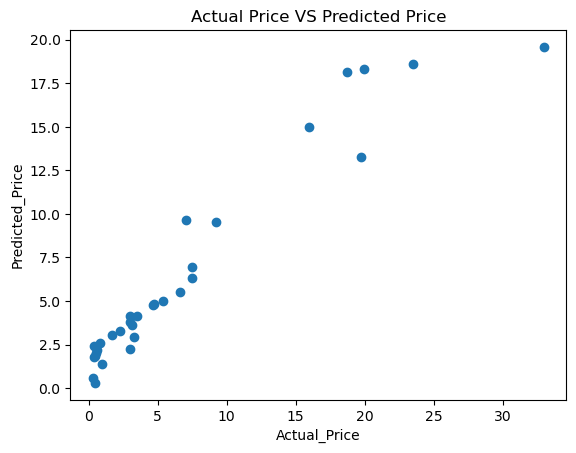

In [54]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Price VS Predicted Price')
plt.show()